In [87]:
import numpy as np
import pandas as pd 

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

Transformations applied to our data befoe feeding it to the algorithm
Making a raw data to a clean data set for getting better results from the applied model

In [89]:
url='http://bit.ly/drinksbycountry' #data loading from url


In [90]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"





THE DATA IS NOT IN A PROPERWAY, SO WE HAVE TO CHANGE IT IN A PROPER WAY

In [91]:
pd.read_table(url,sep=',') # for making the data in a properway 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [92]:
data=pd.read_csv('beer-servings.csv')

In [93]:
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [97]:
data=pd.read_csv('beer-servings.csv',index_col='Unnamed: 0')

In [98]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [99]:
data.shape

(193, 6)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [101]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# Missing Values

DIFFERENT METHODS ARE USED TO FIND OUT THE MISSING VALUES

In [102]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [103]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [104]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [105]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']]

In [106]:
num_cols

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,NaN,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


In [ ]:
#METHOD 1

In [107]:
#simpler imputer    In the simple imputer we are directly filling  the missing values  with MEAN 

In [108]:
from sklearn.impute import SimpleImputer

In [109]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')  
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [110]:
type(num_cols)

numpy.ndarray

In [111]:
num_cols=pd.DataFrame(num_cols,columns=[['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']])

In [112]:
type(num_cols)

pandas.core.frame.DataFrame

In [113]:
num_cols.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [114]:
num_cols.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [115]:
data.drop([ 'beer_servings', 'spirit_servings', 'wine_servings',    #Data have still null values so we are droping the 4 columns from the data
       'total_litres_of_pure_alcohol'],axis=1,inplace=True)

In [116]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [117]:
data=pd.concat([num_cols,data],axis=1) #we are attachhing the num_cols and data both without null values

In [118]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [119]:
data.isna().sum() #from this it is clear that no null values present the data now

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In normal distribution it is okay to use mean to fill missing values but for skewed we cannot use mean
so in case of skewed  distribution we use median since it is not affected by the extreme values

In [120]:
#method 2

In [121]:
data=pd.read_csv('beer-servings.csv',index_col='Unnamed: 0')

In [122]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [123]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [124]:
#for finding the distribution of the data we are doing a frequency plotting

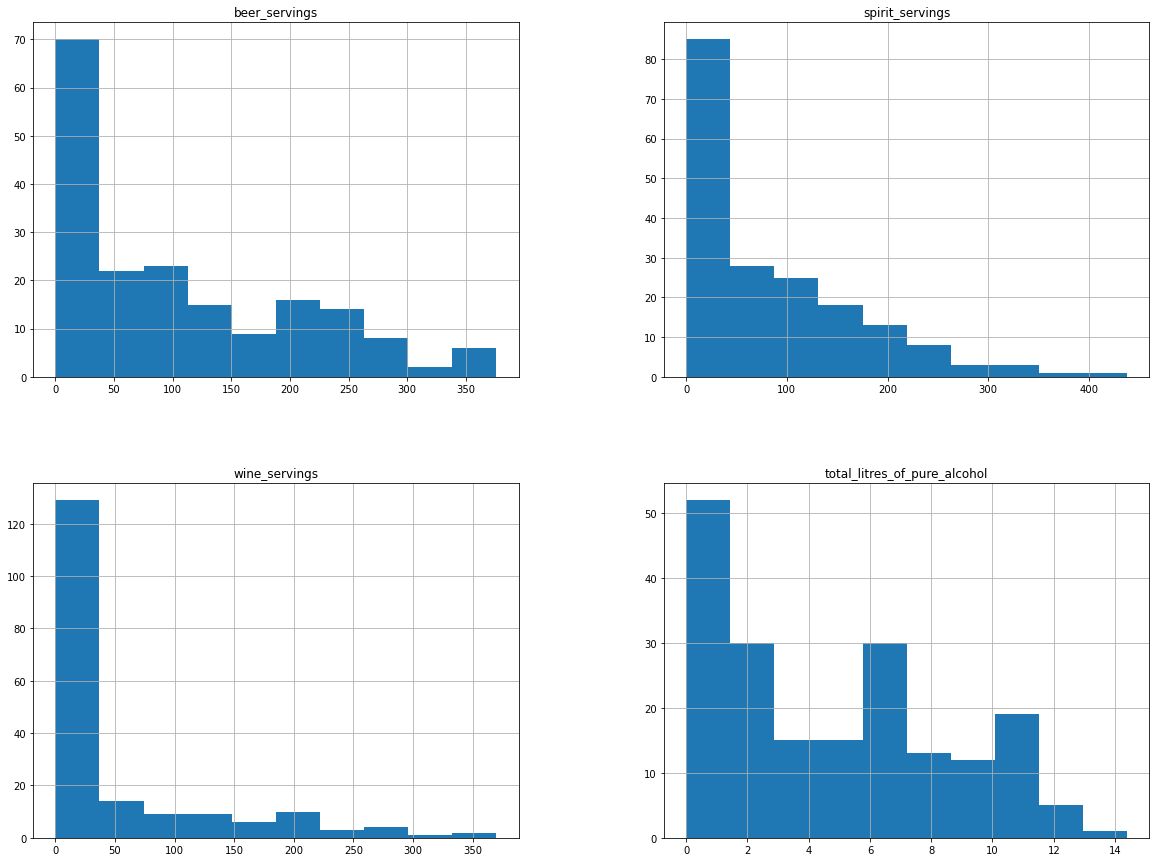

In [125]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [126]:
#rightly skewed so using the median

In [127]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [128]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median()) #filling the missing values with the median value

In [129]:
for col in ['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    data[col]=data[col].fillna(data['beer_servings'].median()) # filling the missing values to other columns using for loop

In [130]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

We have many more methods to fill the missing values

# Outliers

an observation that lies an abnormal distance from other values in a random sample from a population
Not always the outliers can be ignored for eg bank data, hospital data etc

Text(0.5, 1.0, 'beer_servings')

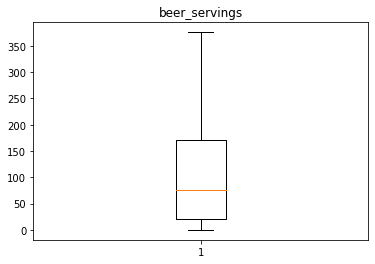

In [131]:
plt.boxplot(data['beer_servings'])    
plt.title('beer_servings')  # use boxplot for finding the outliers    

Text(0.5, 1.0, 'spirit_servings')

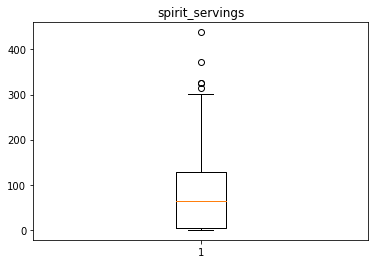

In [132]:
plt.boxplot(data['spirit_servings'])
plt.title('spirit_servings')

In [133]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [134]:
print(Q1)
print(Q2)
print(Q3)

5.0
65.0
128.0


In [135]:


data['spirit_servings'].median()

65.0

In [136]:
IQR=Q3-Q1

In [137]:
IQR

123.0

In [138]:
low_lim=Q1-1.5*(IQR)
uper_lim=Q3+1.5*(IQR)

In [139]:
low_lim

-179.5

In [140]:
uper_lim

312.5

In [141]:
outliers=[]
for i in data['spirit_servings']:
    if (i>uper_lim) or (i<low_lim):
        outliers.append(i)

In [142]:
outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

In [143]:
ind=data['spirit_servings']>uper_lim
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
#data.drop([15, 68, 73, 141, 144], inplace=True)

Text(0.5, 1.0, 'wine_servings')

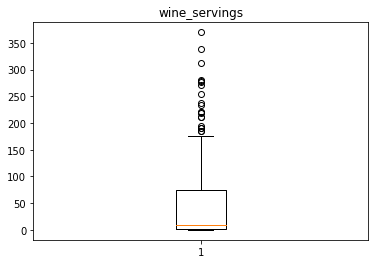

In [168]:
plt.boxplot(data['wine_servings'])
plt.title('wine_servings')

In [169]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [170]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
74.0


In [171]:
data['wine_servings'].median()

9.0

In [172]:
IQR=Q3-Q1

In [173]:
IQR

73.0

In [174]:
low_lim=Q1-1.5*(IQR)
uper_lim=Q3+1.5*(IQR)

In [175]:
low_lim

-108.5

In [176]:
uper_lim

183.5

In [177]:
outliers=[]
for i in data['wine_servings']:
    if (i>uper_lim) or (i<low_lim):
        outliers.append(i)

In [178]:
outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 254.0,
 278.0,
 233.0,
 370.0,
 218.0,
 185.0,
 237.0,
 271.0,
 190.0,
 339.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [179]:
ind=data['wine_servings']>uper_lim
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  42,  48,  55,  61,  67,  75,  83,  99,
            120, 136, 156, 165, 166, 182, 185],
           dtype='int64')

Text(0.5, 1.0, 'total_litres_of_pure_alcohol')

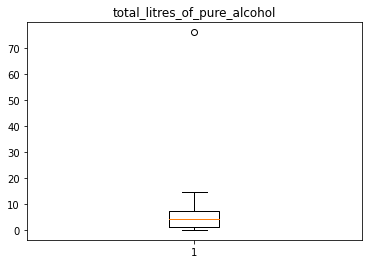

In [180]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('total_litres_of_pure_alcohol')

In [181]:
Q1=np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation='midpoint')
Q2=np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
Q3=np.percentile(data['total_litres_of_pure_alcohol'],75,interpolation='midpoint')

In [182]:
print(Q1)
print(Q2)
print(Q3)

1.3
4.3
7.2


In [183]:
data['total_litres_of_pure_alcohol'].median()

4.3

In [184]:
IQR=Q3-Q1

In [185]:
IQR

5.9

In [186]:
low_lim=Q1-1.5*(IQR)
uper_lim=Q3+1.5*(IQR)

In [187]:
low_lim

-7.550000000000002

In [188]:
uper_lim


16.05

In [189]:
outliers=[]
for i in data['total_litres_of_pure_alcohol']:
    if (i>uper_lim) or (i<low_lim):
        outliers.append(i)


In [190]:
outliers

[76.0]

In [191]:
ind=data['total_litres_of_pure_alcohol']>uper_lim
data.loc[ind].index

Int64Index([13], dtype='int64')